<a href="https://colab.research.google.com/github/manoharsham/topic_model/blob/master/Topic_modeling_LDA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic Modeling in Python**
Its a method to extract hidden topics from a document/corpus and label certain parts of it. This helps to segment a document to certain topics for different users. It is helpful for summarization, improving customer support, SEO and many more.

In [15]:
!git clone https://github.com/manoharsham/topic_model.git manu_model

#print(data[1])
def load_data(data, documents_list, titles, related_items):
  for item in data:
    textdata = item['text']
    title = item['title']
    related_articles=item['related']
    stripped_text = textdata.strip()
    documents_list.append(stripped_text)
    titles.append(title)
    related_items.append(related_articles)

  print("Total Number of Documents:", len(documents_list))

  return documents_list, titles, related_items
 


fatal: destination path 'manu_model' already exists and is not an empty directory.


In [16]:
import json
import glob

doclist = []
titles = []
related= []
for file in glob.glob('manu_model/*files/AA/wiki_*'):
  print("Processing", file, "...")
  data = [json.loads(line) for line in open(file, 'r')]
  doclist, titles, related = load_data(data, doclist, titles, related)

Processing manu_model/Physicsfiles/AA/wiki_00 ...
Total Number of Documents: 41
Processing manu_model/NLPfiles/AA/wiki_01 ...
Total Number of Documents: 183
Processing manu_model/NLPfiles/AA/wiki_00 ...
Total Number of Documents: 314
Processing manu_model/AIfiles/AA/wiki_01 ...
Total Number of Documents: 456
Processing manu_model/AIfiles/AA/wiki_00 ...
Total Number of Documents: 587
Processing manu_model/sigprocfiles/AA/wiki_01 ...
Total Number of Documents: 669
Processing manu_model/sigprocfiles/AA/wiki_00 ...
Total Number of Documents: 858
Processing manu_model/CVfiles/AA/wiki_00 ...
Total Number of Documents: 963
Processing manu_model/speechfiles/AA/wiki_00 ...
Total Number of Documents: 985
Processing manu_model/telecomfiles/AA/wiki_00 ...
Total Number of Documents: 1078
Processing manu_model/MLfiles/AA/wiki_01 ...
Total Number of Documents: 1166
Processing manu_model/MLfiles/AA/wiki_00 ...
Total Number of Documents: 1297


In [0]:
#import modules
import matplotlib.pyplot as plt

In [18]:
print(len(doclist))
import numpy as np
#indices = [i for i, x in enumerate(titles) if x == 'Neural Style Transfer']
unique_idx = [titles.index(x) for x in set(titles)]
titles_act=[titles[i] for i in unique_idx] 
doclist_act=[doclist[i] for i in unique_idx] 
related_act=[related[i] for i in unique_idx] 

titles=titles_act
doclist=doclist_act
related=related_act


1297


In [19]:
print(len(doclist))
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords') 
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

798
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
import re
import nltk

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [0]:
import os.path
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from string import punctuation

def preprocess_data(document):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
        # clean and tokenize document string
    #raw = ''.join(document).lower()
    document=expand_contractions(document.lower(),contractions_dict)
    document=re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", document)
    document = ''.join(c for c in document if c not in punctuation)

    document=document.lower().replace('(','').replace(')','')
    document=document.replace(',','').replace('.','').replace(':','').replace(';','')
    raw = document.lower()
    #tokenizer = RegexpTokenizer(r'\w+')
    #tokens = tokenizer.tokenize(raw)
    tokens = word_tokenize(raw)
        # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
    #texts.append(stemmed_tokens)
    texts=stemmed_tokens
    return texts

In [22]:
print(preprocess_data(doclist[300]))


['lazi', 'learn', 'machin', 'learn', 'lazi', 'learn', 'learn', 'method', 'gener', 'train', 'data', 'theori', 'delay', 'queri', 'made', 'system', 'oppos', 'eager', 'learn', 'system', 'tri', 'gener', 'train', 'data', 'receiv', 'queri', 'primari', 'motiv', 'employ', 'lazi', 'learn', 'knearest', 'neighbor', 'algorithm', 'use', 'onlin', 'recommend', 'system', 'peopl', 'viewedpurchasedlisten', 'movieitemtun', 'also', 'data', 'set', 'continu', 'updat', 'new', 'entri', 'eg', 'new', 'item', 'sale', 'amazon', 'new', 'movi', 'view', 'netflix', 'new', 'clip', 'youtub', 'new', 'music', 'spotifi', 'pandora', 'continu', 'updat', 'train', 'data', 'would', 'render', 'obsolet', 'rel', 'short', 'time', 'especi', 'area', 'like', 'book', 'movi', 'new', 'bestsel', 'hit', 'moviesmus', 'publishedreleas', 'continu', 'therefor', 'one', 'realli', 'talk', 'train', 'phase', 'lazi', 'classifi', 'use', 'larg', 'continu', 'chang', 'dataset', 'attribut', 'commonli', 'queri', 'specif', 'even', 'larg', 'set', 'attribut'

In [0]:
from scipy.stats import entropy
def jensen_shannon(p, q):
  #  p = query[None,:].T 
  #  q = matrix.T
   # print(p.shape)
   # print(q.shape)
    m = 0.5*(p + q)

    return np.sqrt(np.max([0,0.5*(entropy(p,m) + entropy(q,m))]))
def get_most_similar_documents(query,matrix,k=10): #k=10 it will recommend top 10 documents simliar to the given document
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

In [0]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

#print(preprocess_data(doclist[1]))
doclist_list=[preprocess_data(doclist[i]) for i in range(len(doclist))]
dictionary = Dictionary(doclist_list)
corpus = [dictionary.doc2bow(text) for text in doclist_list]
lda = LdaModel(corpus, num_topics=20, minimum_probability=0.0, id2word=dictionary, passes=40)

In [25]:
import random
ref_id=random.randint(0,len(titles));
print(ref_id)
testdoc=preprocess_data(doclist[ref_id])
test_bow = dictionary.doc2bow(testdoc)
test_doc_dist = np.array([tup[1] for tup in lda.get_document_topics(bow=test_bow)])
print(test_doc_dist)

417
[6.4020489e-05 6.4020489e-05 3.0832350e-01 6.4020489e-05 6.4020489e-05
 6.5958843e-02 6.4020489e-05 1.2343487e-01 6.4020489e-05 6.4020489e-05
 6.4020489e-05 6.4020489e-05 6.4020489e-05 6.4020489e-05 3.0293569e-03
 6.4020489e-05 4.9829313e-01 6.4020489e-05 6.4020489e-05 6.4020489e-05]


In [26]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [34]:
import random
#ref_id=random.randint(0,len(titles));
#ref_id=774
#fields = ['ref doc', 'predicted see also', 'predicted metric', 'wiki see also','predicted metric for wiki']  
fields = ['ref doc', 'predicted see also[JS]', 'predicted metric[JS]', 'predicted see also[HM]', 'predicted metric[HM]', 'wiki see also','predicted metric for wiki[JS]','predicted metric for wiki[HM]']  

resultsDict={}
docvecs=[]
docnames=[]
titles1=np.array(titles)
from gensim.matutils import hellinger

for ref_id in range(len(titles1)):
  testdoc=preprocess_data(doclist[ref_id])
  test_bow = dictionary.doc2bow(testdoc)
  test_doc_dist = np.array([tup[1] for tup in lda.get_document_topics(bow=test_bow)])
  docvecs.append(test_doc_dist)
  docnames.append(titles1[ref_id])
for ref_id in range(len(titles1)):
  jssim_vec=[]
  hellsim_vec=[]
  print(ref_id)
  for docid in range(len(titles1)):
    if(docid==ref_id):
      #docvecs.append(test_doc_dist)
      #docnames.append(titles[docid])
      jssim_vec.append(1000)
      hellsim_vec.append(1000)
      continue
    jssim=jensen_shannon(docvecs[docid],docvecs[ref_id])
    hellsim_vec.append(hellinger(docvecs[docid],docvecs[ref_id]))
    #if(docid==ref_id):
    # print('MANOHAR-->',jssim)
    #  print(test_doc_dist)
    #  print(test_doc_dist_new)
    #  pp=test_doc_dist
    #  qq=test_doc_dist_new
    #  mm = 0.5*(pp + qq)
    #  #print('MANU')
      #print(entropy(pp,qq))
    #  new_res=np.sqrt(0.5*(entropy(pp,mm) + entropy(qq,mm)))
    #  #print(new_res)
    jssim_vec.append(jssim)
  #plt.plot(jssim_vec)
  #plt.show
#print(doclist[0])
  jssim_vec=np.array(jssim_vec)
  hellsim_vec=np.array(hellsim_vec)

  top5idx=np.argpartition(jssim_vec, 5)
  top5idx_hm=np.argpartition(hellsim_vec, 5)
  titles1=np.array(titles)
  related1=np.array(related)
  #print('Reference document title--->',titles1[ref_id])
  resultsDict.setdefault(fields[0], []).append(titles1[ref_id])
  #print('Top five similar documents-->',titles1[top5idx[:5]])
  resultsDict.setdefault(fields[1], []).append(titles1[top5idx[:5]])
  #print('Jenson Shannon similarity of top 5 similar topics to reference document:-->')
  #print(jssim_vec[top5idx[:5]])
  resultsDict.setdefault(fields[2], []).append(jssim_vec[top5idx[:5]])
  resultsDict.setdefault(fields[3], []).append(titles1[top5idx_hm[:5]])
  #print('Jenson Shannon similarity of top 5 similar topics to reference document:-->')
  #print(jssim_vec[top5idx[:5]])
  resultsDict.setdefault(fields[4], []).append(jssim_vec[top5idx_hm[:5]])


  U=[S[2:] for S in related1[ref_id].split('\n')]
  U=U[1:-1]
  if '' in U:
    U=U[:U.index('')]
  #print('Top five related documents from Wiki-->',U)
  overlap_idx=[]
  wikiseenames=[]
  wikiseemetrics=[]
  wikiseemetrics_hm=[]

  for ind in range(len(U)):
    for ind2 in range(len(doclist)):
      if(U[ind]==titles[ind2]):
        overlap_idx.append(ind2)
        wikiseenames.append(titles[ind2])
        wikiseemetrics.append(jssim_vec[ind2])
        wikiseemetrics_hm.append(hellsim_vec[ind2])
        #print(titles1[ind2])
        #print(jssim_vec[ind2])
#for i in test_doc_dist.argsort()[::-1][:7]:
#    print(i,lda.show_topic(topicid=i,topn=10),"\n")
# field names  
  resultsDict.setdefault(fields[5], []).append(wikiseenames)
  resultsDict.setdefault(fields[6], []).append(wikiseemetrics)
  resultsDict.setdefault(fields[7], []).append(wikiseemetrics_hm)

  #print(resultsDict)
# name of csv file  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [35]:
dictlist = [dict() for x in range(len(titles1))]
#dictlist = [{fields[0]:resultsDict[fields[0]][i],fields[1]:resultsDict[fields[1]][i],fields[2]:resultsDict[fields[2]][i],fields[3]:resultsDict[fields[3]][i], fields[4]:resultsDict[fields[4]][i]} for i in range(len(titles1))]
dictlist = [{fields[0]:resultsDict[fields[0]][i],fields[1]:resultsDict[fields[1]][i],fields[2]:resultsDict[fields[2]][i],fields[3]:resultsDict[fields[3]][i], fields[4]:resultsDict[fields[4]][i], fields[5]:resultsDict[fields[5]][i], fields[6]:resultsDict[fields[6]][i], fields[7]:resultsDict[fields[7]][i]} for i in range(len(titles1))]

#print(dictlist)
from google.colab import drive
drive.mount('/content/gdrive')
import csv
filename = "results_NT20_P40_1.csv"
    

    
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv dict writer object  
    writer = csv.DictWriter(csvfile, fieldnames = fields)  
        
    # writing headers (field names)  
    writer.writeheader()  
    print('Manohar')    
    # writing data rows 
    for data in dictlist:
      writer.writerow(data)
!cp results_NT20_P40_1.csv "/content/gdrive/My Drive/"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Manohar


797
[525 410 401 671 312]
[2.2133690e-05 2.2133690e-05 8.9220172e-03 2.2133690e-05 2.2133690e-05
 2.2133690e-05 5.9850013e-01 2.0853832e-01 2.2133690e-05 2.2133690e-05
 2.2133690e-05 1.5988803e-02 2.2133690e-05 1.3037340e-01 2.2133690e-05
 2.2133690e-05 1.3556057e-02 2.2133690e-05 2.3833549e-02 2.2133690e-05]
In-phase and quadrature components
Lanczos resampling
Pulse (signal processing)
Hilbert spectral analysis
Pulse-width modulation
Dependent component analysis


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of 

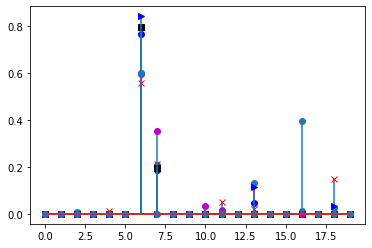

In [29]:
print(ref_id)
print(top5idx[:5])
from matplotlib.pyplot import stem

#stem(y, linefmt='b-', markerfmt='bo', basefmt='r-')

stem(docvecs[ref_id],linefmt='r-')
print(docvecs[ref_id])
jj=0
mf=['bo','rx','ks','b>','mo','gs']
for docid in top5idx[:5]:
  stem(docvecs[docid],markerfmt=mf[jj])
  jj=jj+1
  print(docnames[docid])
stem(docvecs[648])
#plt.show()
print(docnames[648])

  